In [2]:
import os
import time
import uuid
import cv2

In [24]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [26]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [4]:
!pip install labelme albumentations matplotlib

  Using cached labelme-5.1.1-py3-none-any.whl
  Using cached albumentations-1.3.0-py3-none-any.whl (123 kB)
     ---------------------------------------- 7.6/7.6 MB 9.4 MB/s eta 0:00:00
  Using cached natsort-8.2.0-py3-none-any.whl (37 kB)
     -------------------------------------- 151.6/151.6 kB 8.8 MB/s eta 0:00:00
  Using cached imgviz-1.7.2-py3-none-any.whl (7.7 MB)
     ---------------------------------------- 83.6/83.6 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 11.4 MB/s eta 0:00:00
     ---------------------------------------- 42.5/42.5 MB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 12.1/12.1 MB 5.5 MB/s eta 0:00:00
  Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)
  Using cached opencv_python_headless-4.7.0.72-cp37-abi3-win_amd64.whl (38.1 MB)
     -------------------------------------- 160.2/160.2 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 5.9 MB/s eta 0:00:00
     -------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Hieu Nguyen\\anaconda3\\envs\\tf\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [28]:
!labelme

In [1]:
!pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 3.1 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 2.6/2.6 MB 6.8 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     -------------------------------------- 126.5/126.5 kB 7.8 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 6.9 MB/s eta 0:00:00
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
     ---------------------------------------- 3.7/3.7 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 8.6 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 k

In [3]:
!pip install matplotlib

  Using cached matplotlib-3.7.0-cp39-cp39-win_amd64.whl (7.6 MB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached contourpy-1.0.7-cp39-cp39-win_amd64.whl (160 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)


In [4]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [29]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle = False)

In [30]:
images.as_numpy_iterator().next()

b'data\\images\\003087fa-b33a-11ed-ac17-bca3b7697d9f.jpg'

In [33]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [32]:
images = images.map(load_image)

In [33]:
images.as_numpy_iterator().next()

array([[[133, 149, 146],
        [133, 149, 146],
        [135, 152, 146],
        ...,
        [203, 217, 204],
        [202, 213, 199],
        [207, 215, 202]],

       [[131, 147, 144],
        [131, 147, 144],
        [137, 153, 150],
        ...,
        [201, 213, 201],
        [198, 208, 197],
        [203, 211, 198]],

       [[134, 150, 149],
        [128, 144, 141],
        [130, 146, 143],
        ...,
        [203, 213, 202],
        [202, 210, 199],
        [205, 213, 202]],

       ...,

       [[109, 127, 127],
        [103, 122, 120],
        [100, 119, 117],
        ...,
        [121, 118, 113],
        [121, 117, 114],
        [122, 118, 115]],

       [[ 97, 117, 115],
        [ 98, 118, 116],
        [106, 127, 122],
        ...,
        [122, 117, 113],
        [119, 114, 111],
        [121, 115, 115]],

       [[ 94, 114, 112],
        [ 93, 114, 109],
        [104, 125, 120],
        ...,
        [118, 113, 109],
        [118, 109, 110],
        [123, 114, 115]]

In [34]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [35]:
image_generator = images.batch(4).as_numpy_iterator()

In [36]:
plot_images = image_generator.next()

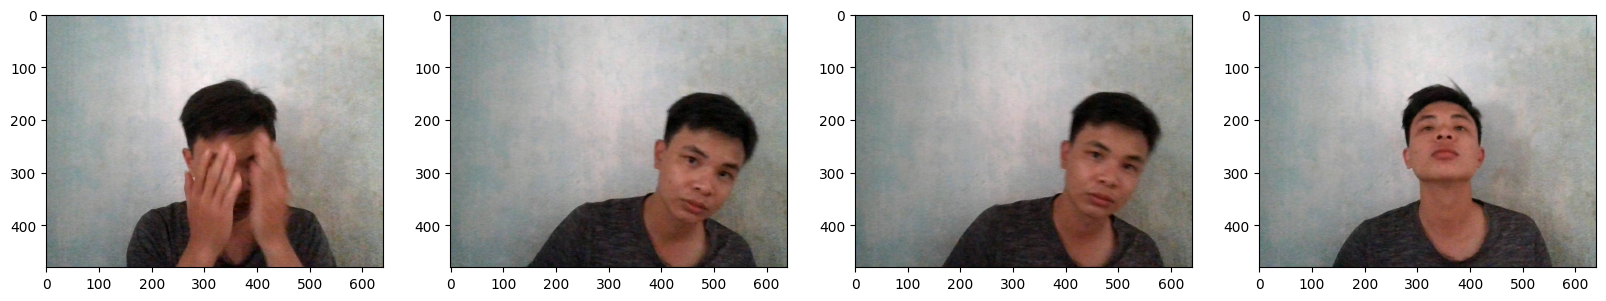

In [37]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [40]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder,'images')):
        
        filename = file.split('.')[0]+'.json' 
        existing_filepath = os.path.join('data','labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath,new_filepath)

In [2]:
import albumentations as alb

In [20]:
augmentor = alb.Compose([alb.RandomCrop(width = 450, height = 450),
alb.HorizontalFlip(p = 0.5),
alb.RandomBrightnessContrast(p = 0.2),
alb.RandomGamma(p=0.2),
alb.RGBShift(p = 0.2),
alb.VerticalFlip(p=0.5)],
bbox_params = alb.BboxParams(format = 'albumentations',label_fields=['class_labels']))

In [21]:
img = cv2.imread(os.path.join('data','train', 'images','00cdafd3-b33a-11ed-ba17-bca3b7697d9f.jpg'))


In [22]:
with open(os.path.join('data', 'train', 'labels', '00cdafd3-b33a-11ed-ba17-bca3b7697d9f.json'), 'r') as f:
    label = json.load(f)

In [23]:
label['shapes'][0]['points']

[[383.40206185567007, 145.1546391752577],
 [594.7422680412371, 390.51546391752584]]

In [24]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [25]:
coords = list(np.divide(coords, [640,480,640,480]))

In [26]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [27]:
augmented['bboxes'][0][2:]

(1.0, 0.8678121420389463)

In [28]:
augmented['bboxes']

[(0.7053379152348224, 0.322565864833906, 1.0, 0.8678121420389463)]

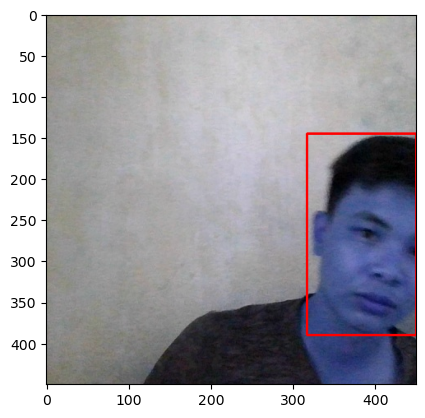

In [29]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [31]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [34]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [35]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [36]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [37]:
train_images.as_numpy_iterator().next()

array([[[0.8063725 , 0.8210784 , 0.7905637 ],
        [0.8177083 , 0.8276961 , 0.8041667 ],
        [0.78229165, 0.7901348 , 0.7783701 ],
        ...,
        [0.8297181 , 0.83756125, 0.8336397 ],
        [0.8199142 , 0.83069855, 0.8224878 ],
        [0.80625   , 0.82193625, 0.8229167 ]],

       [[0.79001224, 0.81715685, 0.79454654],
        [0.7574755 , 0.7814338 , 0.7675858 ],
        [0.7995711 , 0.81623775, 0.811826  ],
        ...,
        [0.79264706, 0.81017154, 0.80631125],
        [0.8063725 , 0.83094364, 0.8317402 ],
        [0.7848039 , 0.813848  , 0.8124387 ]],

       [[0.75214463, 0.7952819 , 0.7717525 ],
        [0.74313724, 0.77843136, 0.76666665],
        [0.7352941 , 0.7588235 , 0.7509804 ],
        ...,
        [0.8108456 , 0.834375  , 0.834375  ],
        [0.8004289 , 0.8391544 , 0.8420956 ],
        [0.75324756, 0.79993874, 0.80012256]],

       ...,

       [[0.5738358 , 0.5738358 , 0.5303309 ],
        [0.54865193, 0.54865193, 0.5172794 ],
        [0.5659314 , 0

In [38]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [39]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [40]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [41]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [42]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 840, 840, 780, 780)

In [43]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [44]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [45]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [46]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.0649 , 0.25   , 0.5645 , 0.8594 ],
        [0.     , 0.11646, 0.597  , 0.847  ],
        [0.1342 , 0.2878 , 0.622  , 0.8306 ],
        [0.3557 , 0.136  , 0.7637 , 0.6562 ],
        [0.09406, 0.2222 , 0.5776 , 0.765  ],
        [0.1997 , 0.09753, 0.7017 , 0.6587 ],
        [0.     , 0.3042 , 0.4304 , 0.8633 ],
        [0.2598 , 0.1371 , 0.9536 , 0.978  ]], dtype=float16))

In [47]:
data_samples = train.as_numpy_iterator()

In [48]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


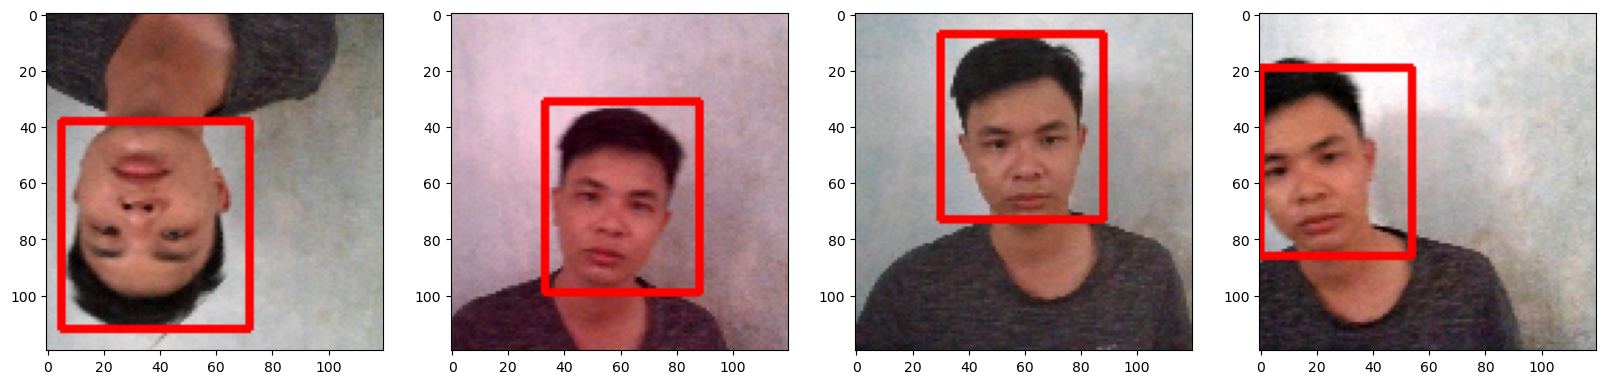

In [49]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [51]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 6s 0us/step


In [52]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [53]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [54]:
facetracker = build_model()

In [55]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [56]:
X, y = train.as_numpy_iterator().next()

In [57]:
X.shape

(8, 120, 120, 3)

In [58]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 618ms/step


In [59]:
classes, coords

(array([[0.5494646 ],
        [0.55404156],
        [0.711515  ],
        [0.5162427 ],
        [0.52770203],
        [0.49208015],
        [0.47988394],
        [0.533012  ]], dtype=float32),
 array([[0.41788673, 0.6063387 , 0.63190347, 0.5590359 ],
        [0.4625364 , 0.5194154 , 0.5844474 , 0.510457  ],
        [0.36352602, 0.546084  , 0.5146904 , 0.50473785],
        [0.43915606, 0.51049083, 0.62591535, 0.51394737],
        [0.40743652, 0.60150343, 0.6577901 , 0.60548955],
        [0.4333106 , 0.4886997 , 0.6413568 , 0.44543815],
        [0.44919455, 0.55959547, 0.6405308 , 0.42435342],
        [0.4684956 , 0.5673963 , 0.599101  , 0.44654724]], dtype=float32))

In [60]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [61]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [62]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [63]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [64]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.868297>

In [65]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6128277>

In [66]:
regressloss(y[1], coords)


<tf.Tensor: shape=(), dtype=float32, numpy=5.868297>

In [67]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [68]:
model = FaceTracker(facetracker)

In [69]:
model.compile(opt, classloss, regressloss)

In [70]:
logdir='logs'

In [71]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [74]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [75]:
tf.config.list_physical_devices('GPU')

[]

In [78]:
hist = model.fit(train, epochs=1, validation_data=val, callbacks=[tensorboard_callback])

473/473 [==============================] - 1082s 2s/step - total_loss: 0.0112 - class_loss: 1.0919e-06 - regress_loss: 0.0112 - val_total_loss: 0.0208 - val_class_loss: 8.9407e-07 - val_regress_loss: 0.0208


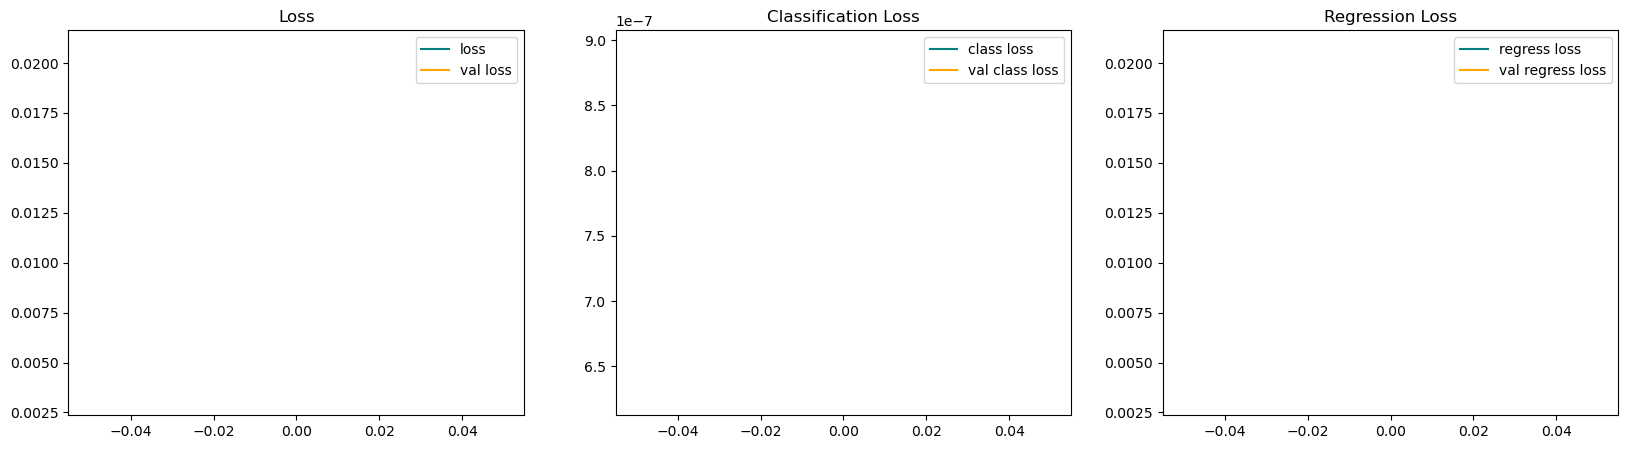

In [79]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [80]:
test_data = test.as_numpy_iterator()

In [81]:
test_sample = test_data.next()

In [82]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 405ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


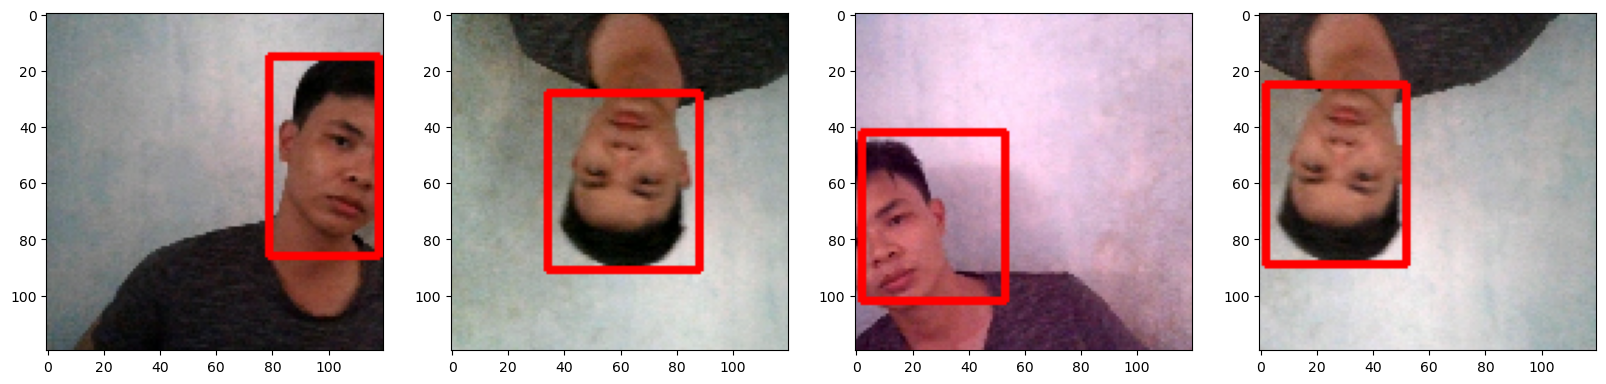

In [83]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [1]:
from tensorflow.keras.models import load_model

In [85]:
facetracker.save('facetracker.h5')

In [6]:

facetracker = load_model('facetracker.h5')

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 87ms/step
